# Creación Dataset Orders (Uri y Bruno)

### Variables a trabajar

Nuevas:
- date_day (year and month)
- net_orders (gross_orders - cancelled_orders)
- orders_cancellation_rate (cancelled_orders / gross_orders)
- net_aov (gross_aov - cancelled_aov)
- net_ttv (gross_item_eur_amount_ttv - cancelled_item_eur_amount_ttv)
- net_revenue_eur (gross_revenue_eur - cancelled_revenue_eur)
- net_take_rate (net_revenue_eur / net_ttv)

## Importar librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Cargar datos

In [2]:
# Cargar el documento y crear el DataFrame
df_raw = pd.read_csv("/content/drive/Shareddrives/Data_TFM/orders_2023_22_21.csv", sep="	", decimal=".", na_values=['(null)'], low_memory=False)
df_raw.head()

,unique_venue_id,year,month,content_channel_name,online_order_segment,payment_method_name,saas_product,gross_orders,gross_item_eur_amount_ttv,gross_aov,gross_revenue_eur,gross_take_rate,cancelled_orders,cancelled_item_eur_amount_ttv,cancelled_aov,cancelled_revenue_eur,cancelled_take_rate
0,1.200002e+10,2022.0,11.0,Marketplace,4.Loyal,Pay at venue,tw_pro,4,120.00,30.000000,0.00,0.000000,1.0,30.00,30.000000,0.00,0.000000
1,1.100039e+10,2022.0,11.0,Marketplace,4.Loyal,Pay at venue,tw_connect,561,16025.01,28.565080,0.00,0.000000,47.0,1298.00,27.617021,0.00,0.000000
2,1.100038e+10,2022.0,11.0,Widget,4.Loyal,iDeal_intent,tw_connect,18,872.00,48.444444,17.44,0.020000,2.0,113.00,56.500000,2.26,0.020000
3,1.100040e+10,2022.0,10.0,Marketplace,4.Loyal,PayPal,tw_connect,12,622.30,51.858333,12.46,0.020022,1.0,145.95,145.950000,2.92,0.020007
4,1.100033e+10,2022.0,11.0,Widget,4.Loyal,PayPal,tw_connect,2,116.24,58.120000,2.34,0.020131,NaN,NaN,NaN,NaN,NaN


## Procesar datos

In [3]:
# Seleccionar las variables a estudiar
df = df_raw.loc[:, ["unique_venue_id", "year","month", "gross_orders", "gross_item_eur_amount_ttv", "gross_aov",
                    "gross_revenue_eur", "gross_take_rate", "cancelled_orders", "cancelled_item_eur_amount_ttv",
                    "cancelled_aov", "cancelled_revenue_eur", "cancelled_take_rate", 'content_channel_name', 'online_order_segment']]

# Visualizar el DataFrame
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5021752 entries, 0 to 5021751
Data columns (total 15 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   unique_venue_id                float64
 1   year                           float64
 2   month                          float64
 3   gross_orders                   int64  
 4   gross_item_eur_amount_ttv      float64
 5   gross_aov                      float64
 6   gross_revenue_eur              float64
 7   gross_take_rate                float64
 8   cancelled_orders               float64
 9   cancelled_item_eur_amount_ttv  float64
 10  cancelled_aov                  float64
 11  cancelled_revenue_eur          float64
 12  cancelled_take_rate            float64
 13  content_channel_name           object 
 14  online_order_segment           object 
dtypes: float64(12), int64(1), object(2)
memory usage: 574.7+ MB
None


,unique_venue_id,year,month,gross_orders,gross_item_eur_amount_ttv,gross_aov,gross_revenue_eur,gross_take_rate,cancelled_orders,cancelled_item_eur_amount_ttv,cancelled_aov,cancelled_revenue_eur,cancelled_take_rate,content_channel_name,online_order_segment
0,1.200002e+10,2022.0,11.0,4,120.00,30.000000,0.00,0.000000,1.0,30.00,30.000000,0.00,0.000000,Marketplace,4.Loyal
1,1.100039e+10,2022.0,11.0,561,16025.01,28.565080,0.00,0.000000,47.0,1298.00,27.617021,0.00,0.000000,Marketplace,4.Loyal
2,1.100038e+10,2022.0,11.0,18,872.00,48.444444,17.44,0.020000,2.0,113.00,56.500000,2.26,0.020000,Widget,4.Loyal
3,1.100040e+10,2022.0,10.0,12,622.30,51.858333,12.46,0.020022,1.0,145.95,145.950000,2.92,0.020007,Marketplace,4.Loyal
4,1.100033e+10,2022.0,11.0,2,116.24,58.120000,2.34,0.020131,NaN,NaN,NaN,NaN,NaN,Widget,4.Loyal


In [4]:
# Visualizar el porcentaje de NaNs por variable
df.isna().mean()*100

unique_venue_id                   0.029233
year                              0.000000
month                             0.000000
gross_orders                      0.000000
gross_item_eur_amount_ttv         0.000000
gross_aov                         0.000000
gross_revenue_eur                 0.000000
gross_take_rate                   1.243231
cancelled_orders                 64.869552
cancelled_item_eur_amount_ttv    64.869552
cancelled_aov                    64.869552
cancelled_revenue_eur            64.869552
cancelled_take_rate              64.892233
content_channel_name              0.000000
online_order_segment              0.000000
dtype: float64

In [5]:
# Eliminar las rows con unique_venue_id NaN
df = df[df['unique_venue_id'].notna()]

In [6]:
# Modificar el type de las variables
df["unique_venue_id"] = df["unique_venue_id"].astype(str)
df['unique_venue_id'] = df['unique_venue_id'].str.slice(stop=-2)
df['gross_orders'] = df['gross_orders'].astype(float)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020284 entries, 0 to 5021751
Data columns (total 15 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   unique_venue_id                object 
 1   year                           float64
 2   month                          float64
 3   gross_orders                   float64
 4   gross_item_eur_amount_ttv      float64
 5   gross_aov                      float64
 6   gross_revenue_eur              float64
 7   gross_take_rate                float64
 8   cancelled_orders               float64
 9   cancelled_item_eur_amount_ttv  float64
 10  cancelled_aov                  float64
 11  cancelled_revenue_eur          float64
 12  cancelled_take_rate            float64
 13  content_channel_name           object 
 14  online_order_segment           object 
dtypes: float64(12), object(3)
memory usage: 612.8+ MB
None


,unique_venue_id,year,month,gross_orders,gross_item_eur_amount_ttv,gross_aov,gross_revenue_eur,gross_take_rate,cancelled_orders,cancelled_item_eur_amount_ttv,cancelled_aov,cancelled_revenue_eur,cancelled_take_rate,content_channel_name,online_order_segment
0,12000021750,2022.0,11.0,4.0,120.00,30.000000,0.00,0.000000,1.0,30.00,30.000000,0.00,0.000000,Marketplace,4.Loyal
1,11000386404,2022.0,11.0,561.0,16025.01,28.565080,0.00,0.000000,47.0,1298.00,27.617021,0.00,0.000000,Marketplace,4.Loyal
2,11000380037,2022.0,11.0,18.0,872.00,48.444444,17.44,0.020000,2.0,113.00,56.500000,2.26,0.020000,Widget,4.Loyal
3,11000400421,2022.0,10.0,12.0,622.30,51.858333,12.46,0.020022,1.0,145.95,145.950000,2.92,0.020007,Marketplace,4.Loyal
4,11000329570,2022.0,11.0,2.0,116.24,58.120000,2.34,0.020131,NaN,NaN,NaN,NaN,NaN,Widget,4.Loyal


In [7]:
df.loc[df["unique_venue_id"] == '110003800']

,unique_venue_id,year,month,gross_orders,gross_item_eur_amount_ttv,gross_aov,gross_revenue_eur,gross_take_rate,cancelled_orders,cancelled_item_eur_amount_ttv,cancelled_aov,cancelled_revenue_eur,cancelled_take_rate,content_channel_name,online_order_segment


In [8]:
# Visualizar el porcentaje de NaNs por variable
df.isna().mean()*100

unique_venue_id                   0.000000
year                              0.000000
month                             0.000000
gross_orders                      0.000000
gross_item_eur_amount_ttv         0.000000
gross_aov                         0.000000
gross_revenue_eur                 0.000000
gross_take_rate                   1.242878
cancelled_orders                 64.859279
cancelled_item_eur_amount_ttv    64.859279
cancelled_aov                    64.859279
cancelled_revenue_eur            64.859279
cancelled_take_rate              64.881967
content_channel_name              0.000000
online_order_segment              0.000000
dtype: float64

Tenemos tantos **valores NaN** en las **variables "cancelled"** ya que si no hay cancelaciones se asigna un valor NaN por defecto.

Por este motivo, vamos a sustituir los valores NaN de estas variables por 0.

In [9]:
# Sustituir valores NaN por 0
df['cancelled_orders'] = df['cancelled_orders'].fillna(0)
df['cancelled_item_eur_amount_ttv'] = df['cancelled_item_eur_amount_ttv'].fillna(0)
df['cancelled_aov'] = df['cancelled_aov'].fillna(0)
df['cancelled_revenue_eur'] = df['cancelled_revenue_eur'].fillna(0)
df['cancelled_take_rate'] = df['cancelled_take_rate'].fillna(0)
df['gross_take_rate'] = df['gross_take_rate'].fillna(0)

# Visualizar el porcentaje de NaNs por variable
df.isna().mean()*100

unique_venue_id                  0.0
year                             0.0
month                            0.0
gross_orders                     0.0
gross_item_eur_amount_ttv        0.0
gross_aov                        0.0
gross_revenue_eur                0.0
gross_take_rate                  0.0
cancelled_orders                 0.0
cancelled_item_eur_amount_ttv    0.0
cancelled_aov                    0.0
cancelled_revenue_eur            0.0
cancelled_take_rate              0.0
content_channel_name             0.0
online_order_segment             0.0
dtype: float64

## Crear nuevas variables

In [10]:
# Crear la variable date_day
df['date_day'] = pd.to_datetime(df[['year', 'month']].assign(day=1))
df['date_day'] = df['date_day'].dt.strftime('%Y-%m-01')

# Eliminar las variables year y month
df = df.drop("year", axis=1)
df = df.drop("month", axis=1)
df.head()

,unique_venue_id,gross_orders,gross_item_eur_amount_ttv,gross_aov,gross_revenue_eur,gross_take_rate,cancelled_orders,cancelled_item_eur_amount_ttv,cancelled_aov,cancelled_revenue_eur,cancelled_take_rate,content_channel_name,online_order_segment,date_day
0,12000021750,4.0,120.00,30.000000,0.00,0.000000,1.0,30.00,30.000000,0.00,0.000000,Marketplace,4.Loyal,2022-11-01
1,11000386404,561.0,16025.01,28.565080,0.00,0.000000,47.0,1298.00,27.617021,0.00,0.000000,Marketplace,4.Loyal,2022-11-01
2,11000380037,18.0,872.00,48.444444,17.44,0.020000,2.0,113.00,56.500000,2.26,0.020000,Widget,4.Loyal,2022-11-01
3,11000400421,12.0,622.30,51.858333,12.46,0.020022,1.0,145.95,145.950000,2.92,0.020007,Marketplace,4.Loyal,2022-10-01
4,11000329570,2.0,116.24,58.120000,2.34,0.020131,0.0,0.00,0.000000,0.00,0.000000,Widget,4.Loyal,2022-11-01


Ahora haremos que cada registro del dataset pertenecza a una **unique_venue_id** y una **date_day** determinada.

Para hacerlo, sumaremos todas las orders, ttv y revenue de cada venue y fecha.

In [11]:
df = df.groupby(["unique_venue_id", "date_day"])['gross_orders','gross_item_eur_amount_ttv',
                                                'gross_revenue_eur','cancelled_orders','cancelled_item_eur_amount_ttv',
                                                'cancelled_revenue_eur'].sum()

df = df.reset_index()
df.head()

<ipython-input-11-930cc0efaeef>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = df.groupby(["unique_venue_id", "date_day"])['gross_orders','gross_item_eur_amount_ttv',


,unique_venue_id,date_day,gross_orders,gross_item_eur_amount_ttv,gross_revenue_eur,cancelled_orders,cancelled_item_eur_amount_ttv,cancelled_revenue_eur
0,11000000039,2021-06-01,41.0,2463.5340,581.76,6.0,319.1250,79.79
1,11000000039,2021-07-01,20.0,1361.4150,307.99,8.0,693.4725,155.27
2,11000000039,2021-08-01,6.0,268.5645,34.28,3.0,167.6100,12.03
3,11000000039,2021-09-01,7.0,468.1425,109.13,4.0,361.5825,90.40
4,11000000106,2021-06-01,20.0,910.2000,170.10,3.0,105.4500,26.36


### Verificaciones
- No puedene existir valores negativos en las variables.
- Cancelled_orders no puede ser superior a gross_orders.
- Cancelled_item_eur_amount_ttv no puede ser superior a gross_item_eur_amount_ttv.
- Cancelled_revenue_eur no puede ser superior a gross_revenue_eur.

In [12]:
# Verficar la no presencia de valores negativos
variables = ['gross_orders', 'gross_item_eur_amount_ttv', 'gross_revenue_eur', 'cancelled_orders', 'cancelled_item_eur_amount_ttv', 'cancelled_revenue_eur']
valores_negativos = df[variables] < 0
print(valores_negativos.any().sum())

# Verificar que cancelled_orders no es superior a gross_orders
orders = df[df["cancelled_orders"] > df["gross_orders"]]
print(orders.any().sum())

# Verificar que cancelled_item_eur_amount_ttv no es superior a gross_item_eur_amount_ttv
ttv = df[df["cancelled_item_eur_amount_ttv"] > df["gross_item_eur_amount_ttv"]]
print(ttv.any().sum())

# Verificar que cancelled_revenue_eur no es superior a gross_revenue_eur
revenue = df[df["cancelled_revenue_eur"] >= df["gross_revenue_eur"]]
print(revenue.any().sum())

0
0
8
8


**Añadir código para visualizar las inconsistencias**

In [13]:
# Crear las variables
df["net_orders"] = df["gross_orders"] - df["cancelled_orders"]
df["orders_cancellation_rate"] = df["cancelled_orders"] / df["gross_orders"]
df["net_ttv"] = df["gross_item_eur_amount_ttv"] - df["cancelled_item_eur_amount_ttv"]
df["net_aov"] = df["net_ttv"] / df["net_orders"]
df["net_revenue_eur"] = df["gross_revenue_eur"] - df["cancelled_revenue_eur"]
df["net_take_rate"] = df["net_revenue_eur"] / df["net_ttv"]

df_orders = df.copy()

# Eliminar las variables
df = df.drop("gross_orders", axis=1)
df = df.drop("cancelled_orders", axis=1)
df = df.drop("gross_item_eur_amount_ttv", axis=1)
df = df.drop("cancelled_item_eur_amount_ttv", axis=1)
df = df.drop("gross_revenue_eur", axis=1)
df = df.drop("cancelled_revenue_eur", axis=1)

# Ordenar las columnas
column_order = ["unique_venue_id", "date_day", "net_orders", "orders_cancellation_rate", "net_aov", "net_take_rate", "net_ttv", "net_revenue_eur"]
df = df.reindex(columns=column_order)
df.head()

,unique_venue_id,date_day,net_orders,orders_cancellation_rate,net_aov,net_take_rate,net_ttv,net_revenue_eur
0,11000000039,2021-06-01,35.0,0.146341,61.268829,0.234083,2144.4090,501.97
1,11000000039,2021-07-01,12.0,0.400000,55.661875,0.228642,667.9425,152.72
2,11000000039,2021-08-01,3.0,0.500000,33.651500,0.220396,100.9545,22.25
3,11000000039,2021-09-01,3.0,0.571429,35.520000,0.175770,106.5600,18.73
4,11000000106,2021-06-01,17.0,0.150000,47.338235,0.178614,804.7500,143.74


In [14]:
# Visualizar el porcentaje de NaNs por variable
df.isna().mean()*100

unique_venue_id             0.000000
date_day                    0.000000
net_orders                  0.000000
orders_cancellation_rate    0.000000
net_aov                     3.898016
net_take_rate               4.039756
net_ttv                     0.000000
net_revenue_eur             0.000000
dtype: float64

Podemos ver que se han creado **valores NaN** en las variables **net_aov** y **net_take_rate**. Vamos a explorarlos para descubrir los motivos.

### Explorar los NaN de la variable net_aov

In [15]:
net_aov = df[["unique_venue_id", "date_day", "net_orders", "net_ttv", "net_aov"]]
net_aov[net_aov["net_aov"].isnull()]

,unique_venue_id,date_day,net_orders,net_ttv,net_aov
26,11000000153,2022-07-01,0.0,0.0,NaN
125,11000000228,2022-11-01,0.0,0.0,NaN
191,11000000386,2022-01-01,0.0,0.0,NaN
244,11000000662,2021-06-01,0.0,0.0,NaN
281,11000000690,2021-11-01,0.0,0.0,NaN
...,...,...,...,...,...
579806,13026416665,2023-05-01,0.0,0.0,NaN
579811,13026417226,2022-01-01,0.0,0.0,NaN
579820,13026417226,2022-11-01,0.0,0.0,NaN
579822,13026417226,2023-02-01,0.0,0.0,NaN


In [16]:
net_aov[(net_aov["net_aov"].isnull()) & ((net_aov["net_orders"] != 0) | (net_aov["net_ttv"] != 0))]

,unique_venue_id,date_day,net_orders,net_ttv,net_aov


Todos los valores NaN de la variable **net_aov** se han creado debido a que el valor de net_orders y el valor de net_ttv son 0. Al hacer una división de 0/0, se están generando los valores NaN.

En este sentido, vamos a sustituir todos los valores NaN de la variable **net_aov** por **valores = 0**.

In [17]:
# Sustituir los NaN de la variable net_aov por 0
df['net_aov'] = df['net_aov'].fillna(0)

### Explorar los NaN de la variable net_take_rate

In [18]:
net_take_rate = df[["unique_venue_id", "date_day", "net_revenue_eur", "net_ttv", "net_take_rate"]]
net_take_rate[net_take_rate["net_take_rate"].isnull()]

,unique_venue_id,date_day,net_revenue_eur,net_ttv,net_take_rate
26,11000000153,2022-07-01,0.0,0.0,NaN
125,11000000228,2022-11-01,0.0,0.0,NaN
139,11000000286,2021-06-01,0.0,0.0,NaN
140,11000000286,2021-07-01,0.0,0.0,NaN
141,11000000286,2021-08-01,0.0,0.0,NaN
...,...,...,...,...,...
579806,13026416665,2023-05-01,0.0,0.0,NaN
579811,13026417226,2022-01-01,0.0,0.0,NaN
579820,13026417226,2022-11-01,0.0,0.0,NaN
579822,13026417226,2023-02-01,0.0,0.0,NaN


In [19]:
net_take_rate[(net_take_rate["net_take_rate"].isnull()) & ((net_take_rate["net_revenue_eur"] != 0) | (net_take_rate["net_ttv"] != 0))]

,unique_venue_id,date_day,net_revenue_eur,net_ttv,net_take_rate


Todos los valores NaN de la variable **net_take_rate** se han creado debido a que el valor de net_revenue_eur y el valor de net_ttv son 0. Al hacer una división de 0/0, se están generando los valores NaN.

En este sentido, vamos a sustituir todos los valores NaN de la variable **net_take_rate** por **valores = 0**.

In [20]:
# Sustituir los NaN de la variable net_take_rate por 0
df['net_take_rate'] = df['net_take_rate'].fillna(0)

In [21]:
# Visualizar el porcentaje de NaNs por variable
df.isna().mean()*100

unique_venue_id             0.0
date_day                    0.0
net_orders                  0.0
orders_cancellation_rate    0.0
net_aov                     0.0
net_take_rate               0.0
net_ttv                     0.0
net_revenue_eur             0.0
dtype: float64

In [22]:
df.head()

,unique_venue_id,date_day,net_orders,orders_cancellation_rate,net_aov,net_take_rate,net_ttv,net_revenue_eur
0,11000000039,2021-06-01,35.0,0.146341,61.268829,0.234083,2144.4090,501.97
1,11000000039,2021-07-01,12.0,0.400000,55.661875,0.228642,667.9425,152.72
2,11000000039,2021-08-01,3.0,0.500000,33.651500,0.220396,100.9545,22.25
3,11000000039,2021-09-01,3.0,0.571429,35.520000,0.175770,106.5600,18.73
4,11000000106,2021-06-01,17.0,0.150000,47.338235,0.178614,804.7500,143.74


### Verificaciones
- No puedene existir valores negativos en las variables.
- No pueden existir valores infinitos en las variables.
- Orders_cancellation_rate no puede ser superior a 1.
- Net_take_rate no puede ser superior a 1.

In [23]:
# Verficar la no presencia de valores negativos
variables = ['net_orders', 'orders_cancellation_rate', 'net_aov', 'net_take_rate']
valores_negativos = df[variables] < 0
variables_con_negativos = valores_negativos.columns[valores_negativos.any()].tolist()
print("Variables con valores inferiores a 0:", variables_con_negativos)

# Verificar la no presencia de valores infinitos
variables_con_inf = [col for col in df.columns if df[col].apply(lambda x: isinstance(x, float) and np.isinf(x)).any()]
print("Variables con valores infinitos:", variables_con_inf)

# Verificar que orders_cancellation_rate no es superior a 1
orders_cancellation = df[df["orders_cancellation_rate"] > 1]
print(orders_cancellation.any().sum())

# Verificar que net_take_rate no es superior a 1
net_take = df[df["net_take_rate"] > 1]
print(net_take.any().sum())

Variables con valores inferiores a 0: ['net_aov', 'net_take_rate']
Variables con valores infinitos: ['net_aov', 'net_take_rate']
0
6


### Explorar los valores inferiores a 0 de la variable net_aov

In [24]:
net_aov = df[["unique_venue_id", "date_day", "net_orders", "net_ttv", "net_aov"]]
net_aov[net_aov["net_aov"]<0]

,unique_venue_id,date_day,net_orders,net_ttv,net_aov
10066,11000265808,2023-05-01,0.0,-1.136868e-13,-inf
19462,11000285932,2021-07-01,0.0,-2.842171e-14,-inf
39642,11000300183,2021-07-01,0.0,-5.684342e-14,-inf
45022,11000303591,2022-07-01,0.0,-5.684342e-14,-inf
50017,11000306135,2022-02-01,0.0,-1.136868e-13,-inf
68186,11000315215,2022-01-01,1.0,-2.842171e-14,-2.842171e-14
68779,11000315557,2021-08-01,0.0,-2.842171e-14,-inf
76882,11000319478,2022-01-01,0.0,-1.421085e-14,-inf
82746,11000321826,2021-10-01,0.0,-1.421085e-14,-inf
84558,11000322554,2022-04-01,0.0,-1.421085e-14,-inf


Podemos ver que los **valores negativos en la variable net_aov** se crean debido a los **valores negativos de la variable net_ttv**.

Aunque puede parecer un error, estos valores negativos se deben a que la **cantidad económica** de las **orders canceladas** es superior a la cantidad económica de las **orders que no se han cancelado**.

En este sentido, vamos a transformar todos estos valores en 0.

In [25]:
# Sustituir los negativos de la variable net_aov por 0
df['net_aov'] = df['net_aov'].apply(lambda x:0 if x < 0 else x)

### Explorar los valores inferiores a 0 de la variable net_take_rate

In [26]:
net_take_rate = df[["unique_venue_id", "date_day", "net_revenue_eur", "net_ttv", "net_take_rate"]]
net_take_rate[net_take_rate["net_take_rate"]<0]

,unique_venue_id,date_day,net_revenue_eur,net_ttv,net_take_rate
8958,11000263156,2021-11-01,-1.421085e-14,0.0,-inf
44146,11000303063,2021-10-01,-1.776357e-15,0.0,-inf
46186,11000304136,2021-06-01,-2.842171e-14,2909.0,-9.770268e-18
46514,11000304416,2022-09-01,-1.421085e-14,124.0,-1.146037e-16
48984,11000305494,2022-10-01,-1.421085e-14,1991.0,-7.137546e-18
...,...,...,...,...,...
465352,12000007778,2022-12-01,-7.105427e-15,1155.4,-6.149755e-18
480011,12000020171,2022-11-01,-2.220446e-16,51.0,-4.353816e-18
482713,12000021573,2023-03-01,-1.110223e-16,0.0,-inf
500641,12000028071,2022-07-01,-1.110223e-16,0.0,-inf


Podemos ver que los **valores negativos en la variable net_take_rate** se crean debido a los **valores negativos de la variable net_revenue_eur**.

Aunque puede parecer un error, estos valores negativos se deben a que la **cantidad económica** de las **orders canceladas** es superior a la cantidad económica de las **orders que no se han cancelado**.

En este sentido, vamos a transformar todos estos valores en 0.

In [27]:
# Sustituir los negativos de la variable net_take_rate por 0
df['net_take_rate'] = df['net_take_rate'].apply(lambda x:0 if x < 0 else x)

### Explorar los valores superiores a 1 de la variable net_take_rate

In [28]:
net_take_rate = df[["unique_venue_id", "date_day", "net_revenue_eur", "net_ttv", "net_take_rate"]]
net_take_rate[net_take_rate["net_take_rate"]>1]

,unique_venue_id,date_day,net_revenue_eur,net_ttv,net_take_rate
24205,11000289589,2021-12-01,1.421085e-14,0.0,inf
25220,11000290148,2022-12-01,1.421085e-14,0.0,inf
28846,11000292509,2021-08-01,3.552714e-15,0.0,inf
32357,11000294830,2021-10-01,1.421085e-14,0.0,inf
71086,11000316776,2021-06-01,3.552714e-15,0.0,inf
106630,11000329566,2022-06-01,7.105427e-15,0.0,inf
139834,11000371581,2021-06-01,2.273737e-13,0.0,inf
159385,11000374967,2021-09-01,7.105427e-15,0.0,inf
161439,11000375282,2022-11-01,2.220446e-16,0.0,inf
175731,11000377312,2023-02-01,8.881784e-16,0.0,inf


Podemos ver que los **valores superiores a 1 de la variable net_take_rate** se crean debido a los **valores 0 de la variable net_ttv**.

Aunque puede parecer un error, estos valores 0 se deben a que la **cantidad económica** de las **orders canceladas** es superior a la cantidad económica de las **orders que no se han cancelado**.

En este sentido, vamos a transformar todos estos valores en 0.

In [29]:
# Sustituir los valores superiroes a 1 de la variable net_take_rate por 0
df['net_take_rate'] = df['net_take_rate'].apply(lambda x:0 if x > 1 else x)

### Explorar los valores infinitos de la variable net_aov

In [30]:
net_aov = df[["unique_venue_id", "date_day", "net_orders", "net_ttv", "net_aov"]]
net_aov[net_aov["net_aov"] == float("inf")]

,unique_venue_id,date_day,net_orders,net_ttv,net_aov
19724,11000286097,2021-12-01,0.0,3.552000e+02,inf
21905,11000287969,2022-05-01,0.0,5.911410e+01,inf
34269,11000295871,2023-01-01,0.0,2.842171e-14,inf
35992,11000297275,2021-11-01,0.0,5.684342e-14,inf
37772,11000298681,2023-01-01,0.0,1.421085e-14,inf
...,...,...,...,...,...
571653,12000042521,2023-03-01,0.0,2.500000e+01,inf
571881,12000042632,2023-02-01,0.0,7.000000e+00,inf
571900,12000042638,2023-03-01,0.0,4.900000e+01,inf
572625,12000042964,2023-04-01,0.0,2.500000e+01,inf


In [31]:
net_aov[(net_aov["net_aov"] == float("inf")) & (net_aov["net_orders"] != 0)]

,unique_venue_id,date_day,net_orders,net_ttv,net_aov


Todos los valores infinitos de la variable **net_aov** se han creado debido a que el valor de net_orders es 0. Al hacer una división de x/0, se están generando los valores infinitos.

En este sentido, vamos a sustituir todos los valores infinitos de la variable **net_aov** por **valores = 0**.

In [32]:
# Sustituir los valores infinitos de la variable net_aov por 0
df['net_aov'] = df['net_aov'].apply(lambda x:0 if x == float("inf") else x)

In [33]:
# Eliminar las variables no necesarias
df = df.drop("net_ttv", axis=1)
df = df.drop("net_revenue_eur", axis=1)

In [34]:
df.net_take_rate.describe()

count    579936.000000
mean          0.116677
std           0.102412
min           0.000000
25%           0.027416
50%           0.093182
75%           0.184118
max           1.000000
Name: net_take_rate, dtype: float64

<Axes: xlabel='net_take_rate', ylabel='Count'>

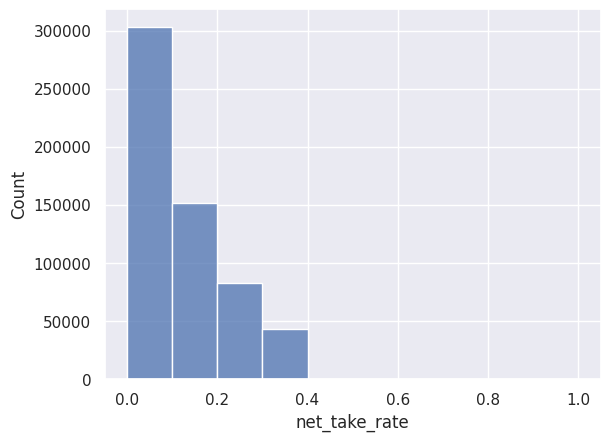

In [35]:
sns.histplot(df.net_take_rate, bins = 10)

## Trabajar duplicados

In [36]:
# Verificar si existen duplicados
df.duplicated(subset=['unique_venue_id', 'date_day'], keep=False).sum()

0

## Visualizar dataframe final

In [37]:
df.describe()

,net_orders,orders_cancellation_rate,net_aov,net_take_rate
count,579936.000000,579936.000000,579936.000000,579936.000000
mean,45.368677,0.215480,44.115789,0.116677
std,84.560829,0.227959,29.863017,0.102412
min,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.066667,27.471095,0.027416
50%,16.000000,0.157895,38.750000,0.093182
75%,49.000000,0.277778,54.807692,0.184118
max,3021.000000,1.000000,2214.038838,1.000000


In [38]:
df

,unique_venue_id,date_day,net_orders,orders_cancellation_rate,net_aov,net_take_rate
0,11000000039,2021-06-01,35.0,0.146341,61.268829,0.234083
1,11000000039,2021-07-01,12.0,0.400000,55.661875,0.228642
2,11000000039,2021-08-01,3.0,0.500000,33.651500,0.220396
3,11000000039,2021-09-01,3.0,0.571429,35.520000,0.175770
4,11000000106,2021-06-01,17.0,0.150000,47.338235,0.178614
...,...,...,...,...,...,...
579931,13026417853,2023-01-01,330.0,0.112903,48.118030,0.030379
579932,13026417853,2023-02-01,273.0,0.116505,51.617949,0.035399
579933,13026417853,2023-03-01,345.0,0.117647,52.729565,0.031647
579934,13026417853,2023-04-01,313.0,0.174142,46.974121,0.021002


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579936 entries, 0 to 579935
Data columns (total 6 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   unique_venue_id           579936 non-null  object 
 1   date_day                  579936 non-null  object 
 2   net_orders                579936 non-null  float64
 3   orders_cancellation_rate  579936 non-null  float64
 4   net_aov                   579936 non-null  float64
 5   net_take_rate             579936 non-null  float64
dtypes: float64(4), object(2)
memory usage: 26.5+ MB


## Consistencia de la Data

No existen valores con 100% de cancelaciones y que presenten net orders

In [40]:
df_cancellation = df[df['orders_cancellation_rate'] == 1]
df_cancellation.net_orders.sum()

0.0

Comportamiento de las Orders

In [41]:
df_orders_hist = df[(df['date_day'] == '2022-03-01') & (df['net_orders'] > 0)]
df_orders_hist.sort_values(by='net_orders', ascending=False).head(20)

,unique_venue_id,date_day,net_orders,orders_cancellation_rate,net_aov,net_take_rate
380209,11000411625,2022-03-01,2832.0,0.124575,11.633280,0.007639
102380,11000329012,2022-03-01,1189.0,0.102642,20.423465,0.043944
55597,11000309033,2022-03-01,1159.0,0.021941,30.916167,0.102137
137692,11000371138,2022-03-01,1042.0,0.164395,37.541267,0.017962
228972,11000384368,2022-03-01,1014.0,0.139949,56.781588,0.080126
240662,11000386404,2022-03-01,990.0,0.079070,28.192162,0.017692
228877,11000384343,2022-03-01,976.0,0.109489,22.690574,0.013749
239674,11000386300,2022-03-01,971.0,0.069923,26.116890,0.052130
325883,11000402425,2022-03-01,945.0,0.102564,18.352381,0.007184
203889,11000380645,2022-03-01,944.0,0.098376,16.498941,0.007236


Valores menores que 0


In [42]:
print((df['net_orders'] < 0).sum())
print((df['orders_cancellation_rate'] < 0).sum())
print((df['net_aov'] < 0).sum())
print((df['net_take_rate'] < 0).sum())

0
0
0
0


## Crear CSV

In [43]:
#df.to_csv('/content/drive/Shareddrives/Data_TFM/uri_bruno_orders.csv', sep="	", index=False)
from google.colab import files

# Save the DataFrame as a CSV file
df.to_csv('df_orders_bruno_uri.csv', sep=',', index=False)
# Download the CSV file
files.download('df_orders_bruno_uri.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>